In [1]:
# import pandas, numpy & re library
import pandas as pd
import numpy as np
import re

In [2]:
# import and download nltk packages
import nltk

nltk.download('popular')
nltk.download('vader_lexicon')

nltk.download(['stopwords', 'names'])

from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\jcchu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\jcchu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\jcchu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\jcchu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\jcchu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [3]:
# read wiki text csv
scraped = pd.read_csv('Presidents Scraped Wiki Text.csv')
scraped

,President,Order,Headline,Text
0,Joe Biden,46,Introduction,Joseph Robinette Biden Jr. (/ˈbaɪdən/ (listen)...
1,Joe Biden,46,Early life (1942–1965),Joseph Robinette Biden Jr. was born on Novembe...
2,Joe Biden,46,"Marriages, law school, and early career (1966–...","On August 27, 1966, Biden married Neilia Hunte..."
3,Joe Biden,46,1972 U.S. Senate campaign in Delaware,"In 1972, Biden defeated Republican incumbent J..."
4,Joe Biden,46,Death of wife and daughter,"On December 18, 1972, a few weeks after Biden ..."
...,...,...,...,...
645,Franklin D. Roosevelt,32,Lynching,Roosevelt stopped short of joining NAACP leade...
646,Franklin D. Roosevelt,32,Japanese-Americans,The attack on Pearl Harbor raised concerns in ...
647,Franklin D. Roosevelt,32,Jews,There is controversy among historians about Ro...
648,Franklin D. Roosevelt,32,Historical reputation,Roosevelt is widely considered to be one of th...


In [4]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [5]:
def get_words(text):
    # removes numbers and punctuation
    text = re.sub('-', ' ', text)
    text = re.sub(r'\'s|[!()\[\]{};:"ˈ,<>./?@#$%^&*_~]', '', text)
    words = [w for w in text.split(' ') if w.isalpha()]
    # removes words with nontraditional letters
    words = [w for w in words if re.search(r'[^A-Za-z]', w) is None]
    # removes common names and stop words
    names = list(map(str.lower, nltk.corpus.names.words()))
    stopwords = nltk.corpus.stopwords.words("english")
    remove_words = names + stopwords
    words = [w for w in words if w.lower() not in remove_words]
    # normalizes text 
    word_list = lemmatize_sentence(words)
    return word_list

In [6]:
# takes around 30s
l_words = []
for i in range(len(scraped)):
    l_words.append(get_words(scraped.iloc[i]['Text']))

In [7]:
print(*l_words[0][:10])

Biden Jr listen born November American politician current president United


In [8]:
fd_list = []
for words in l_words:
    fd = FreqDist(words)
    fd_list.append(fd)

In [25]:
for fd in fd_list[:5]:
    fd.tabulate(1)

Biden 
   10 
Biden 
   14 
Biden 
   15 
Boggs 
    3 
Biden 
    5 


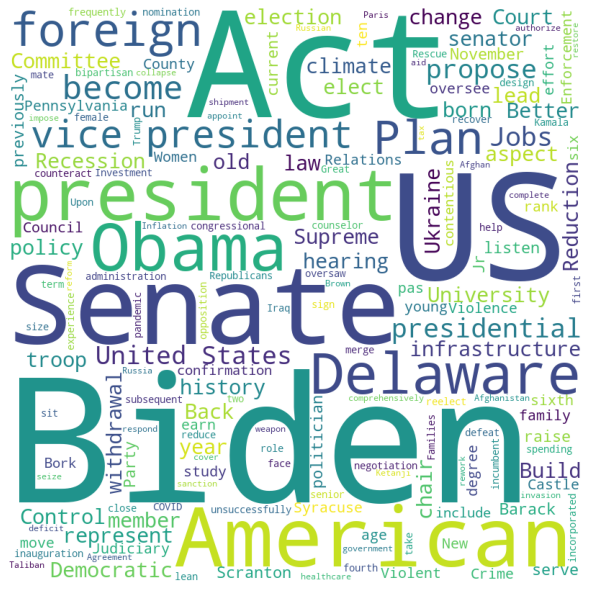

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(l_words[0]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [10]:
scores = []
for words in l_words:
    sia = SentimentIntensityAnalyzer()
    sia_scores = sia.polarity_scores(' '.join(words))
    scores.append(sia_scores)

In [11]:
# compound scoreS range from -1 to 1
scores[:5]

[{'neg': 0.11, 'neu': 0.761, 'pos': 0.13, 'compound': 0.6705},
 {'neg': 0.055, 'neu': 0.839, 'pos': 0.106, 'compound': 0.8519},
 {'neg': 0.135, 'neu': 0.766, 'pos': 0.099, 'compound': -0.9136},
 {'neg': 0.067, 'neu': 0.699, 'pos': 0.233, 'compound': 0.936},
 {'neg': 0.354, 'neu': 0.552, 'pos': 0.094, 'compound': -0.9855}]

In [12]:
# positive example
scraped.Text[3]

'In 1972, Biden defeated Republican incumbent J. Caleb Boggs to become the junior U.S. senator from Delaware. He was the only Democrat willing to challenge Boggs, and with minimal campaign funds, he was given no chance of winning. Family members managed and staffed the campaign, which relied on meeting voters face-to-face and hand-distributing position papers, an approach made feasible by Delaware\'s small size. He received help from the AFL–CIO and Democratic pollster Patrick Caddell. His platform focused on the environment, withdrawal from Vietnam, civil rights, mass transit, equitable taxation, health care, and public dissatisfaction with "politics as usual". A few months before the election, Biden trailed Boggs by almost thirty percentage points, but his energy, attractive young family, and ability to connect with voters\' emotions worked to his advantage and he won with 50.5 percent of the vote. At the time of his election, he was 29 years old, but he reached the constitutionally 

In [13]:
# negative example
scraped.Text[4]

'On December 18, 1972, a few weeks after Biden was elected senator, his wife Neilia and one-year-old daughter Naomi were killed in an automobile accident while Christmas shopping in Hockessin, Delaware. Neilia\'s station wagon was hit by a semi-trailer truck as she pulled out from an intersection. Their sons Beau (aged\xa03) and Hunter (aged\xa02) were taken to the hospital in fair condition, Beau with a broken leg and other wounds and Hunter with a minor skull fracture and other head injuries. Biden considered resigning to care for them, but Senate Majority Leader Mike Mansfield persuaded him not to. Years later, Biden said he believed the truck driver had been drinking before the crash, but was never charged, and the driver\'s family said the deaths haunted him until he died in 1999. Biden later apologized to the driver\'s family. The accident filled Biden with anger and religious doubt. He wrote that he "felt God had played a horrible trick" on him, and he had trouble focusing on wo

In [14]:
scraped_w_scores = scraped.copy()
scraped_w_scores['Score'] = [s['compound'] for s in scores]
scraped_w_scores

,President,Order,Headline,Text,Score
0,Joe Biden,46,Introduction,Joseph Robinette Biden Jr. (/ˈbaɪdən/ (listen)...,0.6705
1,Joe Biden,46,Early life (1942–1965),Joseph Robinette Biden Jr. was born on Novembe...,0.8519
2,Joe Biden,46,"Marriages, law school, and early career (1966–...","On August 27, 1966, Biden married Neilia Hunte...",-0.9136
3,Joe Biden,46,1972 U.S. Senate campaign in Delaware,"In 1972, Biden defeated Republican incumbent J...",0.9360
4,Joe Biden,46,Death of wife and daughter,"On December 18, 1972, a few weeks after Biden ...",-0.9855
...,...,...,...,...,...
645,Franklin D. Roosevelt,32,Lynching,Roosevelt stopped short of joining NAACP leade...,0.7650
646,Franklin D. Roosevelt,32,Japanese-Americans,The attack on Pearl Harbor raised concerns in ...,-0.9729
647,Franklin D. Roosevelt,32,Jews,There is controversy among historians about Ro...,-0.9840
648,Franklin D. Roosevelt,32,Historical reputation,Roosevelt is widely considered to be one of th...,0.9292


In [15]:
scraped_w_scores.to_csv('president_wiki_scraped_scored.csv', index=False)

references:
* https://realpython.com/python-nltk-sentiment-analysis/
* https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
